Перед вами 2 социологических опроса в разных городах. Анализ этих опросов заказал провайдер, который занимается предоставлением услуг Интернета и Телевидения. Провайдер планирует появиться в этих городах. Анализ результатов повлияет на решение о строительстве сети связи и активного продвижения в одном или обоих городах.
Цель опросов – определить текущую рыночную ситуацию в городе по услугам Интернет и ТВ.
Нужно:
1.	Подготовить исходные данные для анализа.
2.	Проанализировать результаты в разных разрезах (по среднему чеку, по долям рынка, по проникновению услуг и т.д.).
3.	Только на основе анализа опросов высказать обоснованную рекомендацию о продвижении в одном или обоих городах. 
4.	
*Используемые сокращения:
ТРИ – Триколор
РОС(Т) – Ростелеком
ИНФО(Т) – Инфотелеком
АНТ – Антенна
ТТК – Транстелеком
Спут – спутниковое ТВ
Каб – кабельное ТВ


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
df = pd.read_csv('citilink.csv')

FileNotFoundError: [Errno 2] File b'citilink.csv' does not exist: b'citilink.csv'

In [66]:
df.dtypes

city               object
internet           object
tv                 object
tv_count          float64
internet_price    float64
tv_price          float64
together_price    float64
flat              float64
total_price       float64
dtype: object

In [6]:
df = df.rename(columns={'company_name' : 'internet'});

## Разрез по среднему чеку

#### Заменяем пустые значения в столбцах с ценами на 0 для арифметических операций

In [7]:
df['internet_price'] = df['internet_price'].fillna(0)
df['tv_price'] = df['tv_price'].fillna(0)
df['together_price'] = df['together_price'].fillna(0)

#### Создаем новую колонку, в которой будет информация о сумме платежей

In [8]:
df['total_price'] = df['internet_price'] + df['tv_price'] + df['together_price']

Для начала посмотрим на сетку корреляций количества телевизоров, типа жилья и суммы общего чека:

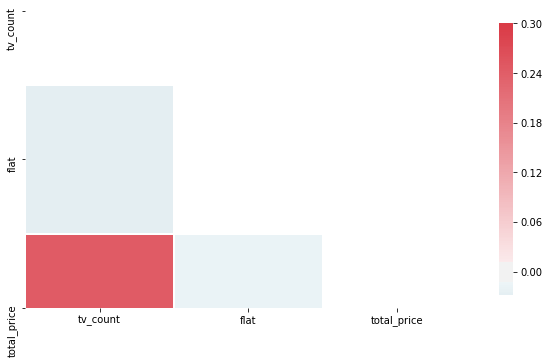

In [47]:
subdf = df.drop(['internet_price', 'tv_price', 'together_price'], axis=1)
corr = subdf.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Мы видим только небольшую зависимость общего чека с количеством телевизоров, но она весьма незначительна

#### Сравним средние платежи по городам

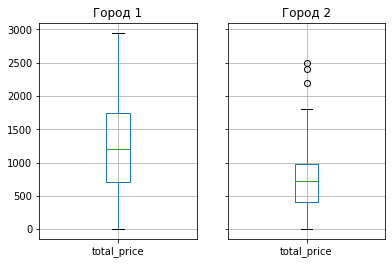

In [9]:
df.groupby('city').boxplot(column='total_price');

In [10]:
df.groupby('city')['total_price'].mean()

city
Город 1    1162.567568
Город 2     769.361699
Name: total_price, dtype: float64

А так же посмотрим на распределение по чекам:

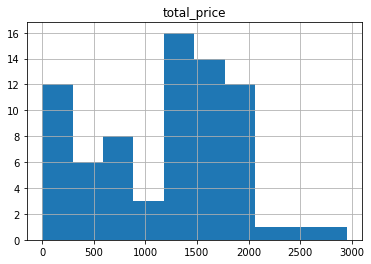

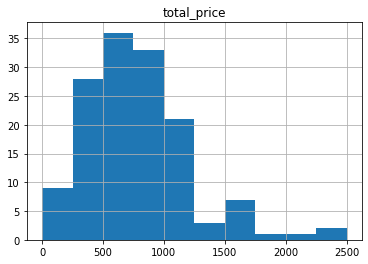

In [63]:
hist = df.groupby('city').hist(column='total_price');

#### Проверим, являются ли эти различия статистически значимыми при помощи критерия t-Стьюдента. За нулевую гипотезу примем, что средние платежи в обеих генеральных совокупностях равны.

In [12]:
from scipy import stats
stats.ttest_ind(df[df['city'] == 'Город 1']['total_price'],df[df['city'] == 'Город 2']['total_price'])

Ttest_indResult(statistic=4.981573538598015, pvalue=1.3027035485631532e-06)

p-value позволяет утверждать, что различия значимы

## Разрез по долям в рынке

Взглянем на доли рынка в первом городе:

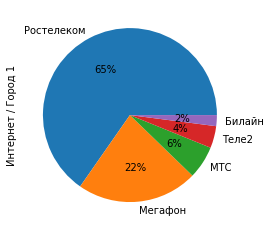

In [61]:
df[df['city'] == 'Город 1']['internet'].value_counts(normalize=True).plot(kind='pie', 
                                                            autopct='%1.0f%%', label='Интернет / Город 1');

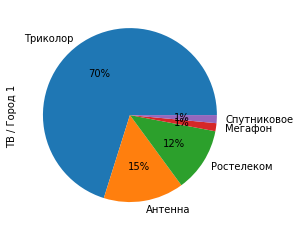

In [57]:
df[df['city'] == 'Город 1']['tv'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', label='ТВ / Город 1');

Теперь во втором городе

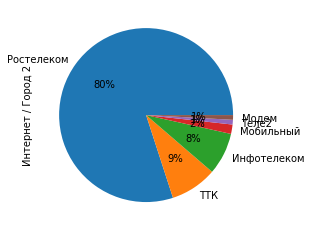

In [60]:
df[df['city'] == 'Город 2']['internet'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', 
                                                                          label='Интернет / Город 2');

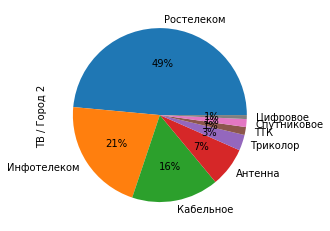

In [59]:
df[df['city'] == 'Город 2']['tv'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', label='ТВ / Город 2');

Мы можем заметить, что в городах сильные различия по долям ТВ-операторов. В первом городе гораздо популярнее спутниковое ТВ (Триколор, спутниковое). Возможно, значимые различия по среднему чеку обусловлены именно этим. Взглянем, сколько в среднем тратят на ТВ.

In [17]:
print('В городе 1 средние расходы отдельно на ТВ: ', \
      df[(df['tv_price'] > 0) & (df['city'] == 'Город 1')]['tv_price'].mean())
print('В городе 2 средние расходы отдельно на ТВ: ', \
      df[(df['tv_price'] > 0) & (df['city'] == 'Город 2')]['tv_price'].mean())

В городе 1 средние расходы отдельно на ТВ:  1214.8936170212767
В городе 2 средние расходы отдельно на ТВ:  375.84904905660375


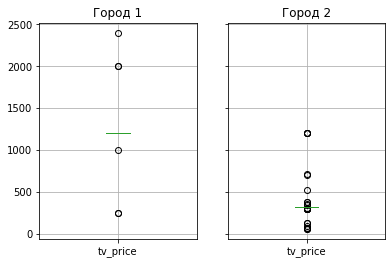

In [18]:
df[df['tv_price'] > 0].groupby('city').boxplot(column='tv_price');

Взглянем так же на данные по интернету:

In [19]:
print('В городе 1 средние расходы отдельно на интернет: ', \
      df[(df['internet_price'] > 0) & (df['city'] == 'Город 1')]['internet_price'].mean())
print('В городе 2 средние расходы отдельно на интернет: ', \
      df[(df['internet_price'] > 0) & (df['city'] == 'Город 2')]['internet_price'].mean())

В городе 1 средние расходы отдельно на интернет:  549.7435897435897
В городе 2 средние расходы отдельно на интернет:  497.3809523809524


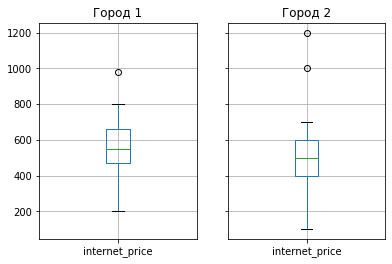

In [20]:
df[df['internet_price'] > 0].groupby('city').boxplot(column='internet_price');

Мы можем заметить, что тут различия не такие значимые.
Таким образом, можем сделать вывод, что в разрезе ниша ТВ-услуг в первом городе наиболее нишевая.

## Разрез по проникновению услуг

Доля опрошенных с подключенными усоугами в городах:

In [21]:
print('Доля с подключенным интернетом в городе 1: ',
round(1 - (df[df['city'] == 'Город 1']['internet'].fillna(0).isin([0]).sum() / 
           df[df['city'] == 'Город 1']['internet'].count()),2))

print('Доля с подключенным интернетом в городе 2: ',
round(1 - (df[df['city'] == 'Город 2']['internet'].fillna(0).isin([0]).sum() / 
           df[df['city'] == 'Город 2']['internet'].count()),2))

print('Доля с подключенным ТВ в городе 1: ',
round(1 - (df[df['city'] == 'Город 1']['tv'].fillna(0).isin([0]).sum() / 
           df[df['city'] == 'Город 1']['tv'].count()),2))

print('Доля с подключенным ТВ в городе 2: ',
round(1 - (df[df['city'] == 'Город 2']['tv'].fillna(0).isin([0]).sum() / 
           df[df['city'] == 'Город 2']['tv'].count()),2))

Доля с подключенным интернетом в городе 1:  0.49
Доля с подключенным интернетом в городе 2:  0.77
Доля с подключенным ТВ в городе 1:  0.9
Доля с подключенным ТВ в городе 2:  0.96


Вывод: в первом городе намного меньше проникновение услуг

## Остальные показатели

### Посмотрим на количество телевизоров в среднем в двух городах

Для этого для начала пропущенные значения заполним нулями:

In [26]:
df['tv_count'] = df['tv_count'].fillna(0)

In [30]:
print('Среднее количество телевизоров в 1 городе: ', round(df[df['city'] == 'Город 1']['tv_count'].mean(),2))
print('Среднее количество телевизоров в 2 городе: ', round(df[df['city'] == 'Город 2']['tv_count'].mean(),2))

Среднее количество телевизоров в 1 городе:  1.41
Среднее количество телевизоров в 2 городе:  1.84


Посмотрим, как взаимосвязаны количество телевизоров и общий чек:

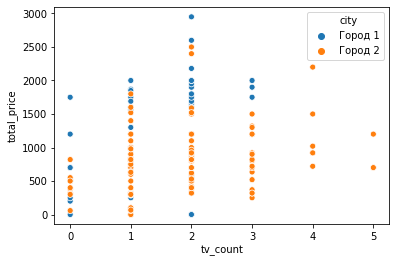

In [38]:
sns.scatterplot(x='tv_count', y='total_price', hue='city', data=df);

Зависимость среднего чека от типа дома:

In [49]:
print('Средний чек в частных домах: ', round(df[df['flat'] == 0]['total_price'].mean(),2))
print('Среднее чек в квартирах: ', round(df[df['flat'] == 1]['total_price'].mean(),2))

Средний чек в частных домах:  1023.33
Среднее чек в квартирах:  984.82


Большие различия в этих разрезах мы не нашли.

### Вывод:

Мы нашли сильную разницу в средней стоимости ТВ-услуг в 2 городах (Город 1 - 1162.56, Город 2 - 769.36). Предположили, что это связано с тем, что в городе 1 слабо развито кабельное ТВ, которое сильно дешевле спутникового.
Так же заметили, что городе 1 гораздо слабее проникновение интернет услуг (49% против 77%).
В связи с этими факторами можем предположить, что оператору гораздо перспективней продвижение в городе 1.